# Bankruptcy

> El 10% de toda la población ecuatoriana trabaja en el sector de la manufactura. Además, el 12.53% del PIB del Ecuador está constituido por esta industria. Sin embargo, en un estudio realizado desde 1901 hasta el 2018, el 89% de las pequeñas y medianas empresas relacionadas con la manufactura han quebrado. Es decir, que una de las industrias más importantes para el país, es de las más riesgosas a pesar de su importancia. De acuerdo a un estudio realizado usando el modelo Z de las empresas manufactureras del país, las razones principales por las que fallas este tipo de empresas es por la escasa liquidez, la falta de reinversión de los resultados acumulados en la propia producción, la subutilización de activos que ha influenciado en gran medida a no contar con autonomía financiera y un nivel de ventas tolerante.


## DATASET


In [2]:
! pip install -r requirements.txt

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [191]:
# Importamos todas las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [192]:
# En caso de hacerlo en drive
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Se procede a cargar los archivos csv y se muestran los 5 primeros filas
#orig_df = pd.read_csv('/content/drive/MyDrive/RIIAA6.0/data.csv')
orig_df  = pd.read_csv('data.csv')
orig_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [194]:
df = orig_df.copy()

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [196]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [197]:
# Reemplazar espacios en blanco por '-'
df.columns = [c.strip().replace(' ', '_') for c in df.columns]
df.head()

,Bankrupt?,ROA(C)_before_interest_and_depreciation_before_interest,ROA(A)_before_interest_and_%_after_tax,ROA(B)_before_interest_and_depreciation_after_tax,Operating_Gross_Margin,Realized_Sales_Gross_Margin,Operating_Profit_Rate,Pre-tax_net_Interest_Rate,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,...,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,No-credit_Interval,Gross_Profit_to_Sales,Net_Income_to_Stockholder's_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_(DFL),Interest_Coverage_Ratio_(Interest_expense_to_EBIT),Net_Income_Flag,Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [198]:
df.rename(columns = {'Bankrupt?':'Bankrupt'}, inplace = True)

### Columnas Innecesarias


In [199]:
with pd.option_context('display.max_rows', None):
    print(df.nunique())
# Existe datos nulos

Bankrupt                                                      2
ROA(C)_before_interest_and_depreciation_before_interest    3333
ROA(A)_before_interest_and_%_after_tax                     3151
ROA(B)_before_interest_and_depreciation_after_tax          3160
Operating_Gross_Margin                                     3781
Realized_Sales_Gross_Margin                                3788
Operating_Profit_Rate                                      3376
Pre-tax_net_Interest_Rate                                  3789
After-tax_net_Interest_Rate                                3604
Non-industry_income_and_expenditure/revenue                2551
Continuous_interest_rate_(after_tax)                       3617
Operating_Expense_Rate                                     2966
Research_and_development_expense_rate                      1536
Cash_flow_rate                                             5557
Interest-bearing_debt_interest_rate                        1080
Tax_rate_(A)                            

In [200]:
print("Net_Income_Flag")
print("Datos Unicos:", df['Net_Income_Flag'].value_counts())
print(df['Net_Income_Flag'].unique())


Net_Income_Flag
Datos Unicos: 1    6819
Name: Net_Income_Flag, dtype: int64
[1]


In [201]:
# Eliminamos porque tiene el mismo valor para todo y no nos ayuda para el análisis
df = df.drop('Net_Income_Flag', axis=1)

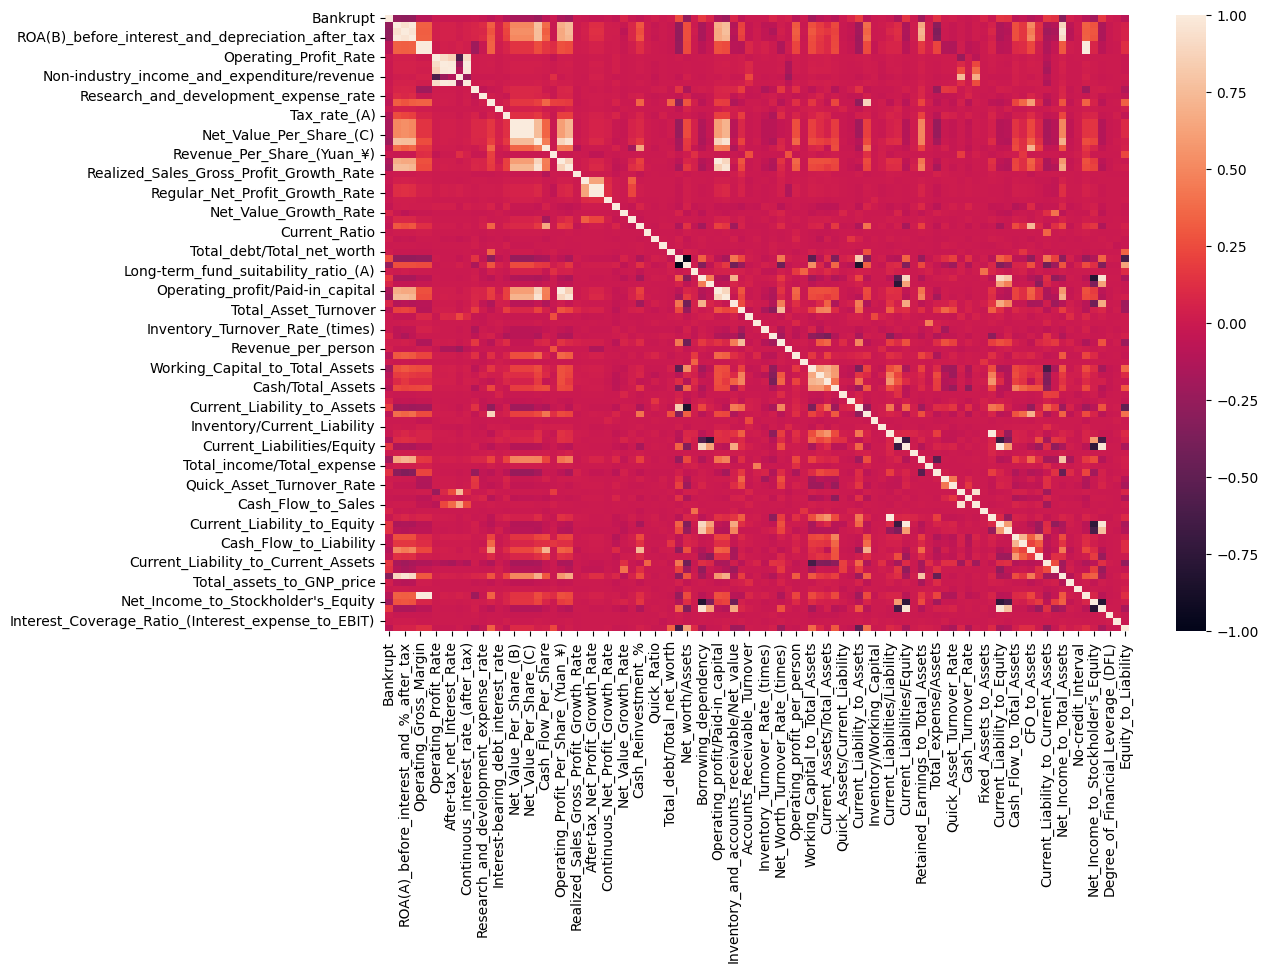

In [202]:
# Ver correlaciones entre las columnas
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr)
plt.show()

In [203]:
for c in df.columns:
  unique_values = df[c].unique()
  if len(unique_values) == 2:
    print(c, unique_values)

Bankrupt [1 0]
Liability-Assets_Flag [0 1]


### Liability-Assets_Flag
> Un indicador de solvencia, nos podría indicar si los pasivos de una empresa exceden sus activos, lo cual es una señal de advertencia de insolvencia potencial o dificultades financieras.

In [204]:
df['Liability-Assets_Flag'].value_counts()

0    6811
1       8
Name: Liability-Assets_Flag, dtype: int64

In [205]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

### Brankrupt Analysis

In [206]:
df['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

In [207]:
df['Bankrupt'].value_counts()/df['Bankrupt'].shape[0]

0    0.967737
1    0.032263
Name: Bankrupt, dtype: float64

In [208]:
# Buscar correlación directa con el quiebre de la compañia
correlation_with_target = corr['Bankrupt'].abs().sort_values(ascending=False)
correlation_with_target

Bankrupt                                                   1.000000
Net_Income_to_Total_Assets                                 0.315457
ROA(A)_before_interest_and_%_after_tax                     0.282941
ROA(B)_before_interest_and_depreciation_after_tax          0.273051
ROA(C)_before_interest_and_depreciation_before_interest    0.260807
                                                             ...   
Inventory/Current_Liability                                0.000822
Long-term_Liability_to_Current_Assets                      0.000778
Cash_Flow_to_Sales                                         0.000479
Realized_Sales_Gross_Profit_Growth_Rate                    0.000458
Operating_Profit_Rate                                      0.000230
Name: Bankrupt, Length: 95, dtype: float64

In [209]:
print("Cantidad de columnas con correlación al quiebre de la compañia mayor a 0.01")
features_with_correlation = correlation_with_target[correlation_with_target.values > 0.01].index
print(len(features_with_correlation))


Cantidad de columnas con correlación al quiebre de la compañia mayor a 0.01
72


In [210]:
print("Cantidad de columnas con correlación al quiebre de la compañia mayor a 0.02")
features_with_correlation2 = correlation_with_target[correlation_with_target.values > 0.02].index
print(len(features_with_correlation2))

Cantidad de columnas con correlación al quiebre de la compañia mayor a 0.02
64


In [211]:
print("Cantidad de columnas con correlación al quiebre de la compañia mayor a 0.03")
features_with_correlation3 = correlation_with_target[correlation_with_target.values > 0.03].index
print(len(features_with_correlation3))

Cantidad de columnas con correlación al quiebre de la compañia mayor a 0.03
57


### Liability-Assets_Flag

In [212]:
df.isnull().sum()

Bankrupt                                                   0
ROA(C)_before_interest_and_depreciation_before_interest    0
ROA(A)_before_interest_and_%_after_tax                     0
ROA(B)_before_interest_and_depreciation_after_tax          0
Operating_Gross_Margin                                     0
                                                          ..
Net_Income_to_Stockholder's_Equity                         0
Liability_to_Equity                                        0
Degree_of_Financial_Leverage_(DFL)                         0
Interest_Coverage_Ratio_(Interest_expense_to_EBIT)         0
Equity_to_Liability                                        0
Length: 95, dtype: int64

In [213]:
corr['Liability-Assets_Flag']

Bankrupt                                                   0.139212
ROA(C)_before_interest_and_depreciation_before_interest   -0.109272
ROA(A)_before_interest_and_%_after_tax                    -0.156890
ROA(B)_before_interest_and_depreciation_after_tax         -0.120680
Operating_Gross_Margin                                    -0.032930
                                                             ...   
Net_Income_to_Stockholder's_Equity                         0.192688
Liability_to_Equity                                       -0.229559
Degree_of_Financial_Leverage_(DFL)                        -0.001717
Interest_Coverage_Ratio_(Interest_expense_to_EBIT)        -0.000974
Equity_to_Liability                                       -0.027573
Name: Liability-Assets_Flag, Length: 95, dtype: float64

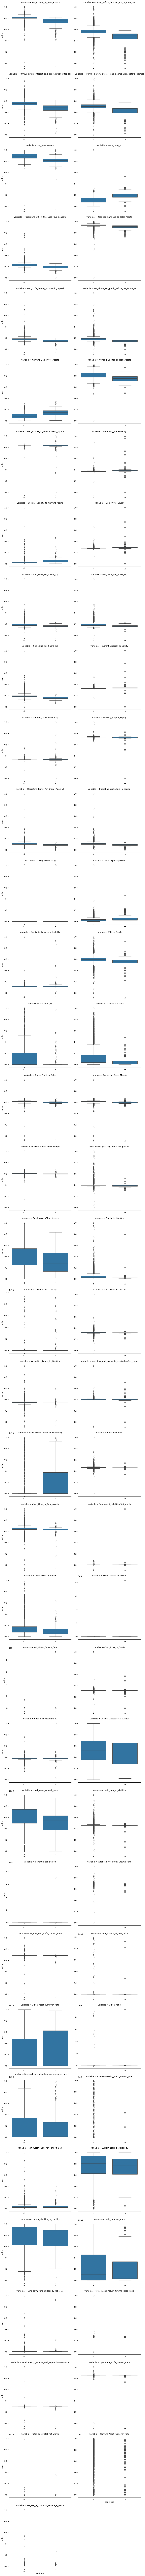

In [214]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.xticks(rotation=90)  # Corrected the rotation syntax

# Melt the DataFrame
f = pd.melt(df, id_vars=['Bankrupt'], value_vars=correlation_with_Bankrupt_mayores001)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "Bankrupt", "value")
plt.tight_layout()

# Show the plot
plt.show()

### Tratamiento de Outliers con análisis de cuartiles


In [215]:

def iqr_treatment(df, threshold=1.5):
    treated_df = df.copy()
    for column in df.columns:
        if column == 'Bankrupt' or column == 'Liability-Assets_Flag':
          continue
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        treated_df[column] = treated_df[column].clip(lower=lower_bound, upper=upper_bound)
    return treated_df

filtered_df = iqr_treatment(df)
filtered_df.shape

(6819, 95)

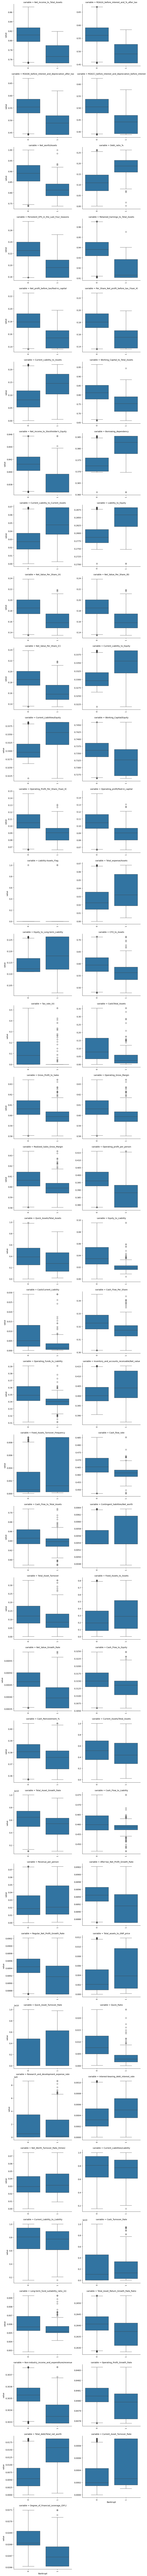

In [216]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.xticks(rotation=90)

# Tratar esos outliers
f = pd.melt(filtered_df, id_vars=['Bankrupt'], value_vars=features_with_correlation)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "Bankrupt", "value")
plt.tight_layout()
plt.show()

### Modelamiento de dato para aprendizaje automático,

In [217]:
from sklearn.preprocessing import StandardScaler

X = filtered_df.drop('Bankrupt', axis=1)
y = filtered_df['Bankrupt']
columns_to_scale = X.columns
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [219]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Class distribution before SMOTE:", Counter(y_train))
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution before SMOTE: Counter({0: 5279, 1: 176})
Class distribution after SMOTE: Counter({0: 5279, 1: 5279})


SMOTE (Synthetic Minority Over-sampling Technique) es un método ampliamente utilizado para abordar el desequilibrio de clases en los problemas de clasificación del aprendizaje automático.

In [220]:
X_train.shape, X_test.shape

((5455, 94), (1364, 94))

In [221]:
y_train.value_counts()

0    5279
1     176
Name: Bankrupt, dtype: int64

In [222]:
y_test.value_counts()

0    1320
1      44
Name: Bankrupt, dtype: int64

In [223]:
features_with_correlation = correlation_with_target[correlation_with_target.values > 0.09].index
len(features_with_correlation)
features_with_correlation = features_with_correlation[1:]

In [224]:
len(features_with_correlation)

34

In [225]:
features_with_correlation

Index(['Net_Income_to_Total_Assets', 'ROA(A)_before_interest_and_%_after_tax',
       'ROA(B)_before_interest_and_depreciation_after_tax',
       'ROA(C)_before_interest_and_depreciation_before_interest',
       'Net_worth/Assets', 'Debt_ratio_%',
       'Persistent_EPS_in_the_Last_Four_Seasons',
       'Retained_Earnings_to_Total_Assets',
       'Net_profit_before_tax/Paid-in_capital',
       'Per_Share_Net_profit_before_tax_(Yuan_¥)',
       'Current_Liability_to_Assets', 'Working_Capital_to_Total_Assets',
       'Net_Income_to_Stockholder's_Equity', 'Borrowing_dependency',
       'Current_Liability_to_Current_Assets', 'Liability_to_Equity',
       'Net_Value_Per_Share_(A)', 'Net_Value_Per_Share_(B)',
       'Net_Value_Per_Share_(C)', 'Current_Liability_to_Equity',
       'Current_Liabilities/Equity', 'Working_Capital/Equity',
       'Operating_Profit_Per_Share_(Yuan_¥)',
       'Operating_profit/Paid-in_capital', 'Liability-Assets_Flag',
       'Total_expense/Assets', 'Equity_to_Lon

# Models

In [226]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report, recall_score, make_scorer

In [227]:
minority_f1_score = make_scorer(f1_score, labels=[1], average='binary')

In [228]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [7, 10],
    'criterion': ['gini', 'entropy']
}

### Softmax Regression

In [229]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [230]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

In [231]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

In [232]:
input_dim = X_train.shape[1]
output_dim = len(torch.unique(y_train_tensor))
model = SoftmaxRegression(input_dim, output_dim)

In [233]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [234]:
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

In [235]:
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test_tensor)
    _, y_pred_tensor = torch.max(test_outputs, 1)
    y_pred = y_pred_tensor.numpy()

### Random Forest

In [236]:
rf_model = RandomForestClassifier(random_state=42)

# Random Forest tuning
rf_tuned = GridSearchCV(rf_model, param_grid, cv=5, scoring=minority_f1_score)
# rf_tuned = rf_model
rf_tuned.fit(X_train_smote[features_with_correlation], y_train_smote)

print("Best Random Forest Model:")
print(rf_tuned.best_params_)

rf_train_preds = rf_tuned.predict(X_train[features_with_correlation])
#Evaluar
rf_val_preds = rf_tuned.predict(X_test[features_with_correlation])

print("\nF1-Score on Validation Set:")
print(f"Random Forest: {f1_score(y_test, rf_val_preds)}")

# Calcular el acuracy 
rf_train = round(accuracy_score(y_train, rf_train_preds)*100,2)
rf_test = round(accuracy_score(y_test, rf_val_preds)*100,2)
print("Train Accuracy: ",rf_train)
print("Test Accuracy: ",rf_test)

Best Random Forest Model:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20}

F1-Score on Validation Set:
Random Forest: 0.39285714285714285
Train Accuracy:  96.7
Test Accuracy:  92.52


In [237]:
# Reporte de clasificación
print("Classification Report - Train\n")
print(classification_report(y_train, rf_train_preds))
print("\nClassification Report - Test\n")
print(classification_report(y_test, rf_val_preds))

Classification Report - Train

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5279
           1       0.49      0.99      0.66       176

    accuracy                           0.97      5455
   macro avg       0.75      0.98      0.82      5455
weighted avg       0.98      0.97      0.97      5455


Classification Report - Test

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1320
           1       0.27      0.75      0.39        44

    accuracy                           0.93      1364
   macro avg       0.63      0.84      0.68      1364
weighted avg       0.97      0.93      0.94      1364



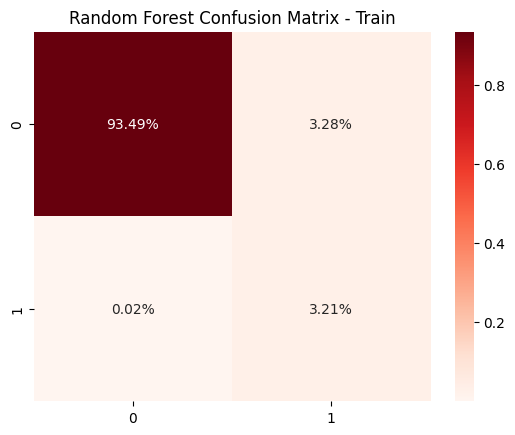

In [238]:
# Matriz de Confusión
cm1 = confusion_matrix(y_train, rf_train_preds)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Random Forest Confusion Matrix - Train",fontsize=12)
plt.show()

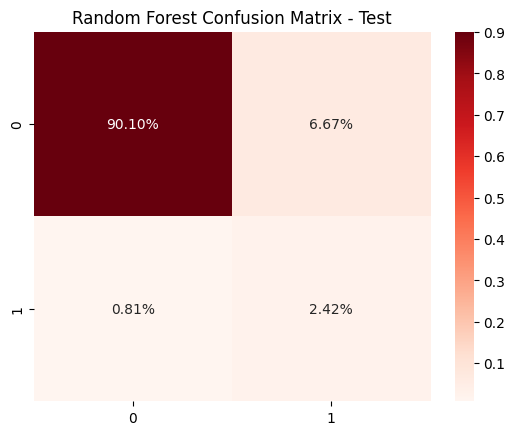

In [239]:
cm1 = confusion_matrix(y_test, rf_val_preds)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Random Forest Confusion Matrix - Test",fontsize=12)
plt.show()

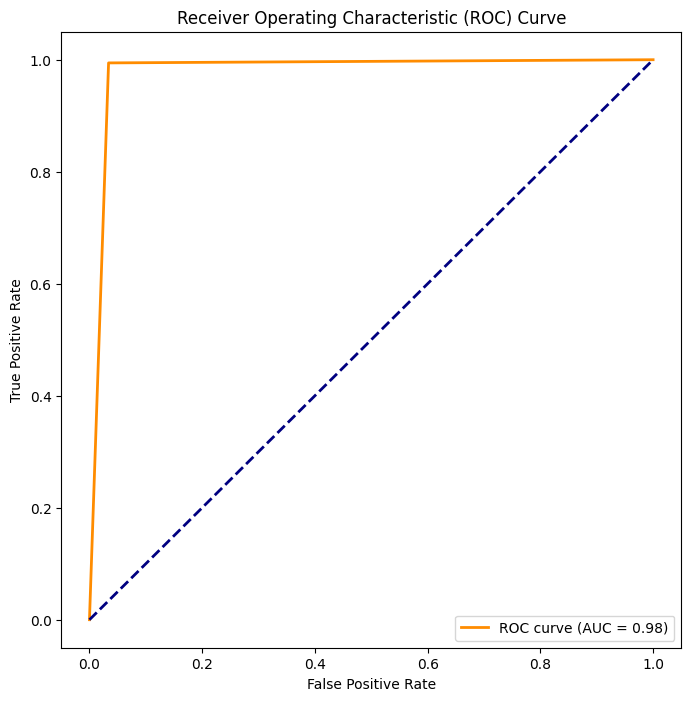

In [240]:
from sklearn.metrics import roc_curve, roc_auc_score, auc


fpr, tpr, thresholds = roc_curve(y_train, rf_train_preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

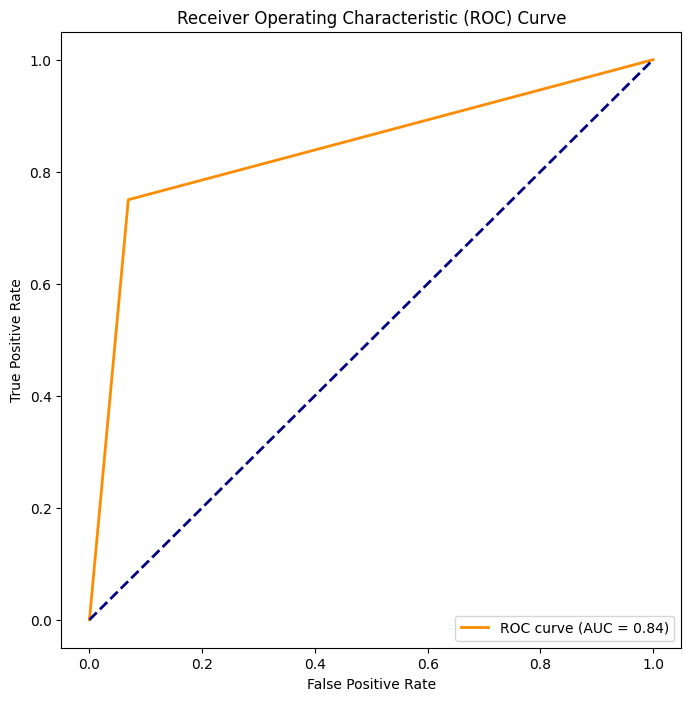

In [241]:
from sklearn.metrics import roc_curve, roc_auc_score, auc


fpr, tpr, thresholds = roc_curve(y_test, rf_val_preds)


roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Gradient Boosting

In [242]:

param_grid = {
    'n_estimators': [10, 20],
    'max_features': [5, 10, 15],
    'max_depth': [5, 10],
    'criterion': ['squared_error', 'friedman_mse']
}

gb_model = GradientBoostingClassifier(random_state=42)

gb_tuned = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring=minority_f1_score)
gb_tuned.fit(X_train_smote[features_with_correlation], y_train_smote)

print("\nBest Gradient Boosted Trees Model:")
print(gb_tuned.best_params_)


Best Gradient Boosted Trees Model:
{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 10, 'n_estimators': 20}


In [243]:
gb_train_preds = gb_tuned.predict(X_train[features_with_correlation])
#Evaluar Predicción
gb_val_preds = gb_tuned.predict(X_test[features_with_correlation])

print("\nF1-Score on Validation Set:")
print(f"Gradient Boosting: {f1_score(y_test, rf_val_preds)}")

#Calcular el acuracy
gb_train = round(accuracy_score(y_train, gb_train_preds)*100,2)
gb_test = round(accuracy_score(y_test, gb_val_preds)*100,2)
print("Train Accuracy: ",gb_train)
print("Test Accuracy: ",gb_test)


F1-Score on Validation Set:
Gradient Boosting: 0.39285714285714285
Train Accuracy:  98.24
Test Accuracy:  94.21


In [244]:
# Reporte de clasificación
print("Classification Report - Train\n")
print(classification_report(y_train, gb_train_preds))
print("\nClassification Report - Test\n")
print(classification_report(y_test, gb_val_preds))

Classification Report - Train

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5279
           1       0.65      1.00      0.79       176

    accuracy                           0.98      5455
   macro avg       0.82      0.99      0.89      5455
weighted avg       0.99      0.98      0.98      5455


Classification Report - Test

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1320
           1       0.32      0.68      0.43        44

    accuracy                           0.94      1364
   macro avg       0.65      0.82      0.70      1364
weighted avg       0.97      0.94      0.95      1364



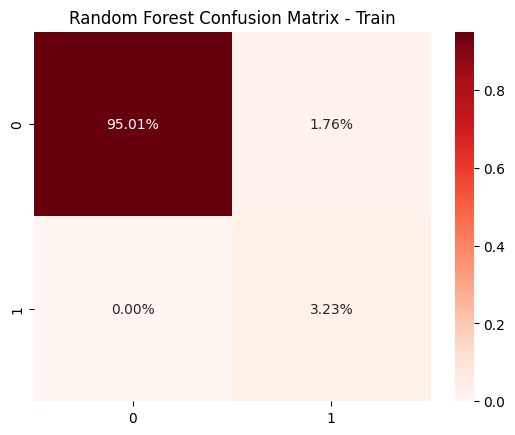

In [245]:
cm1 = confusion_matrix(y_train, gb_train_preds)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Random Forest Confusion Matrix - Train",fontsize=12)
plt.show()

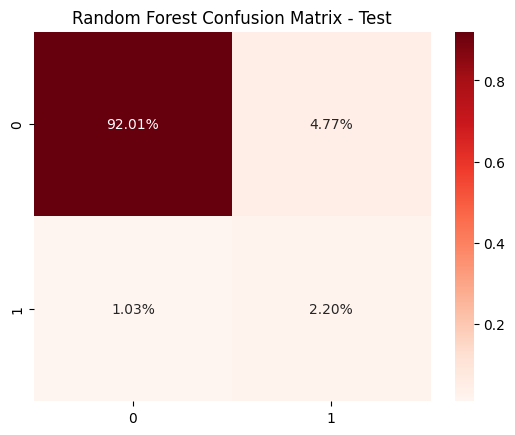

In [246]:
cm1 = confusion_matrix(y_test, gb_val_preds)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Random Forest Confusion Matrix - Test",fontsize=12)
plt.show()

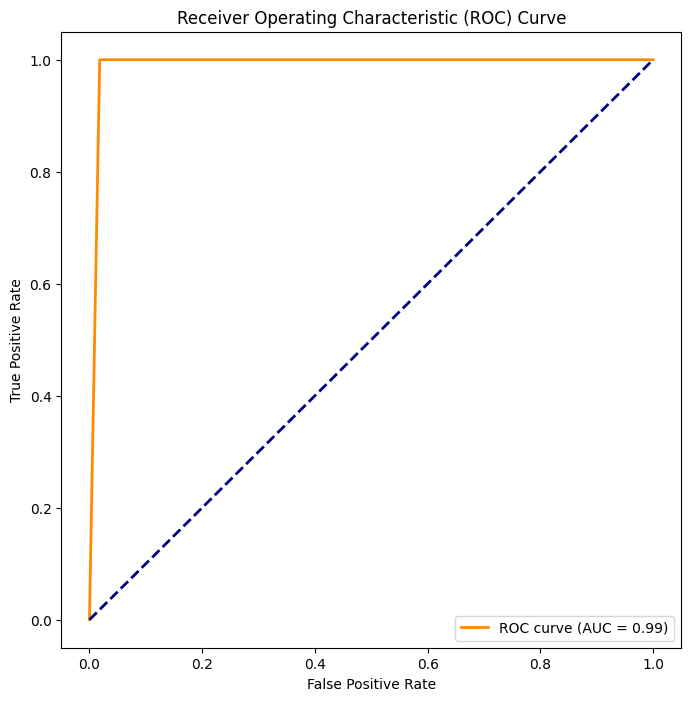

In [247]:
from sklearn.metrics import roc_curve, roc_auc_score, auc


fpr, tpr, thresholds = roc_curve(y_train, gb_train_preds)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

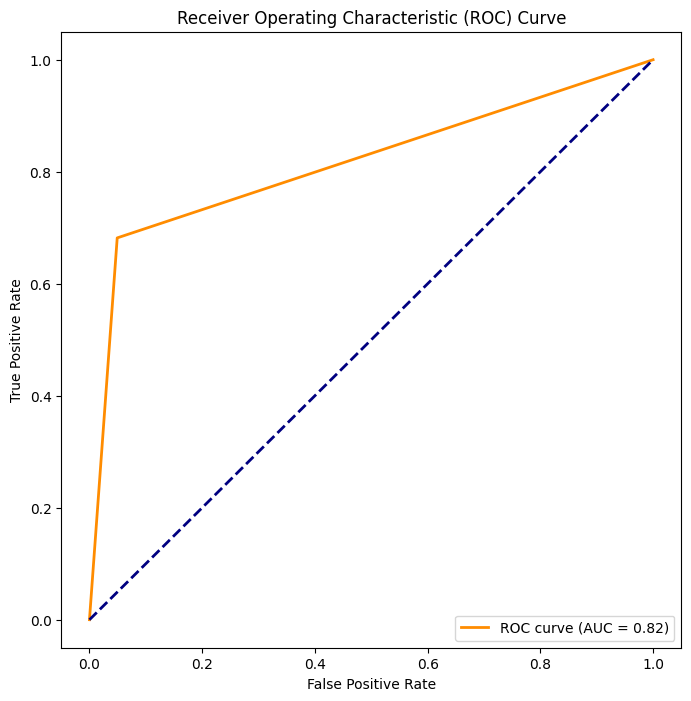

In [248]:
from sklearn.metrics import roc_curve, roc_auc_score, auc


fpr, tpr, thresholds = roc_curve(y_test, gb_val_preds)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Extra Trees

In [249]:

param_grid = {
    'n_estimators': [10, 20],
    'max_features': [5, 10, 15],
    'max_depth': [7, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

et_model = ExtraTreesClassifier(random_state=42)

et_tuned = GridSearchCV(ExtraTreesClassifier(random_state=42), param_grid, cv=5, scoring=minority_f1_score)
et_tuned.fit(X_train_smote[features_with_correlation], y_train_smote)

print("\nBest Extra Trees Model:")
print(et_tuned.best_params_)


Best Extra Trees Model:
{'criterion': 'gini', 'max_depth': 10, 'max_features': 15, 'n_estimators': 10}


In [250]:
et_train_preds = et_tuned.predict(X_train[features_with_correlation])

et_val_preds = et_tuned.predict(X_test[features_with_correlation])

print("\nF1-Score on Validation Set:")
print(f"Extra Trees: {f1_score(y_test, et_val_preds)}")


et_train = round(accuracy_score(y_train, et_train_preds)*100,2)
et_test = round(accuracy_score(y_test, et_val_preds)*100,2)
print("Train Accuracy: ",et_train)
print("Test Accuracy: ",et_test)


F1-Score on Validation Set:
Extra Trees: 0.40229885057471265
Train Accuracy:  94.68
Test Accuracy:  92.38


In [251]:
# Reporte
print("Classification Report - Train\n")
print(classification_report(y_train, et_train_preds))
print("\nClassification Report - Test\n")
print(classification_report(y_test, et_val_preds))

Classification Report - Train

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      5279
           1       0.38      1.00      0.55       176

    accuracy                           0.95      5455
   macro avg       0.69      0.97      0.76      5455
weighted avg       0.98      0.95      0.96      5455


Classification Report - Test

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1320
           1       0.27      0.80      0.40        44

    accuracy                           0.92      1364
   macro avg       0.63      0.86      0.68      1364
weighted avg       0.97      0.92      0.94      1364



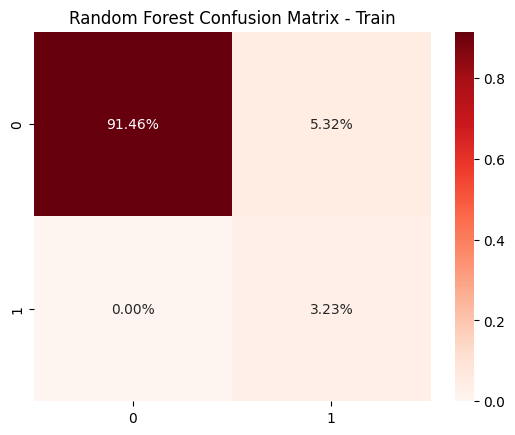

In [252]:
cm1 = confusion_matrix(y_train, et_train_preds)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Random Forest Confusion Matrix - Train",fontsize=12)
plt.show()

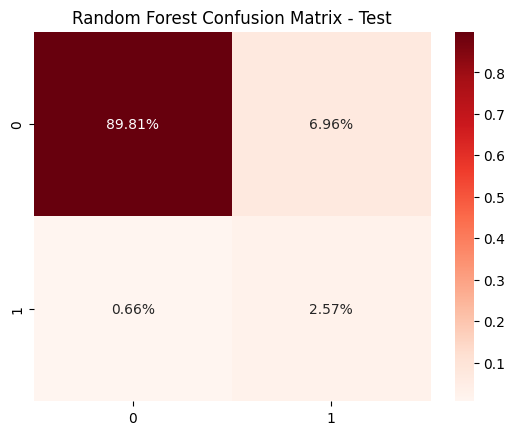

In [253]:
cm1 = confusion_matrix(y_test, et_val_preds)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Random Forest Confusion Matrix - Test",fontsize=12)
plt.show()

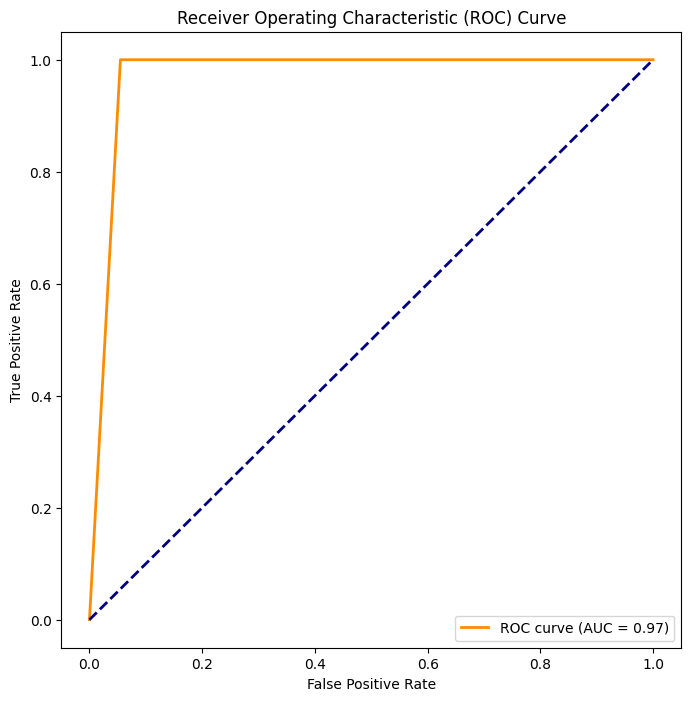

In [254]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(y_train, et_train_preds)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

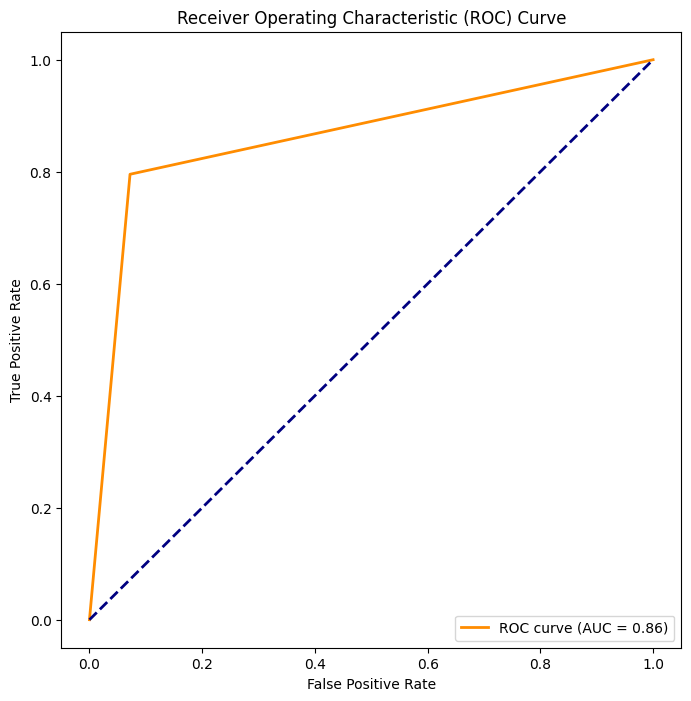

In [255]:
from sklearn.metrics import roc_curve, roc_auc_score, auc


fpr, tpr, thresholds = roc_curve(y_test, et_val_preds)


roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

### Summary

Puntuaciones F1 en el conjunto de validación:

Bosque aleatorio: 0,39

Aumento de gradiente: 0,39

Árboles adicionales: 0,4

Además, podemos observar un sobreajuste en los gráficos AUC anteriores; esto se puede reducir disminuyendo max_features, max_ Depth y n_estimators. Esto conduce a una pequeña reducción en f1_score.

**Futuras mejoras:**
Existe margen de mejora en f1_score a partir de estos modelos aumentando la complejidad e introduciendo la regularización.
Manejar el desequilibrio en los datos es crucial en el aprendizaje automático, especialmente cuando se trata de tareas de clasificación en las que una clase supera significativamente a la otra. Los conjuntos de datos desequilibrados pueden dar lugar a modelos sesgados que funcionan mal en la clase minoritaria. Aquí hay varias otras técnicas para manejar el desequilibrio en los datos a través de diferentes métodos de muestreo:


1. Modelos ponderados:

   Ajuste las ponderaciones de clase en el modelo para penalizar la clasificación errónea de la clase minoritaria más que de la clase mayoritaria.

   Muchos clasificadores en scikit-learn, como el parámetro class_weight en SVM o el atributo class_weight en Random Forest, le permiten asignar diferentes pesos a las clases.

2. Métodos de conjunto:

   Embolsado con submuestreo: aplique embolsado (agregación Bootstrap) con submuestreo aleatorio en cada muestra de arranque.

   Impulso: Técnicas como AdaBoost o XGBoost se pueden adaptar para dar más peso a la clase minoritaria.

3. Detección de anomalías:
   Trate la clase minoritaria como una anomalía y utilice técnicas de detección de anomalías como Isolation Forests o One-Class SVM.